# Convergence Analysis for SPH -- Group Awe

This is an analysis for the result of SPH project

Run this cell before start

In [2]:
%matplotlib inline
%precision 16
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import os.path
import sys


In [3]:
# Some functions to plot 
def parameter_time(data, dt, interval):
    time = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        time[i] = i*dt
    fig = plt.figure(figsize=(10,8), facecolor='white')
    plt.plot(time,data.iloc[:,0], label = "Wave Height")
    plt.plot(time,data.iloc[:,1], label = "Position of Crest")
    plt.xlabel('Time / s', fontsize=15)
    plt.ylabel('Position / m', fontsize=15)
    plt.title('The wave height and position of crest', fontsize=15)
    plt.legend()
        
def waveheight_time(data, dt, interval):
    time = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        time[i] = i*dt
    fig = plt.figure(figsize=(10,8), facecolor='white')
    plt.plot(time,data.iloc[:,0])
    plt.xlabel('Time / s', fontsize=15)
    plt.ylabel('Height / m', fontsize=15)
    plt.title('The wave height of different time', fontsize=15)
    
def parameter(data):
    fig = plt.figure(figsize=(10,8), facecolor='white')
    plt.plot(data.iloc[:,1],data.iloc[:,0])
    plt.xlabel('Position / m', fontsize=15)
    plt.ylabel('Height / m', fontsize=15)
    plt.title('The wave height and position of crest', fontsize=15)
    
def get_velocity(data, dt):
    vel = np.zeros(data.shape[0]-1)
    for i in range(data.shape[0]-1):
        vel[i] = (data.iloc[i+1,1] - data.iloc[i,1])/ (dt)
    return np.mean(vel)

4.446297964330751


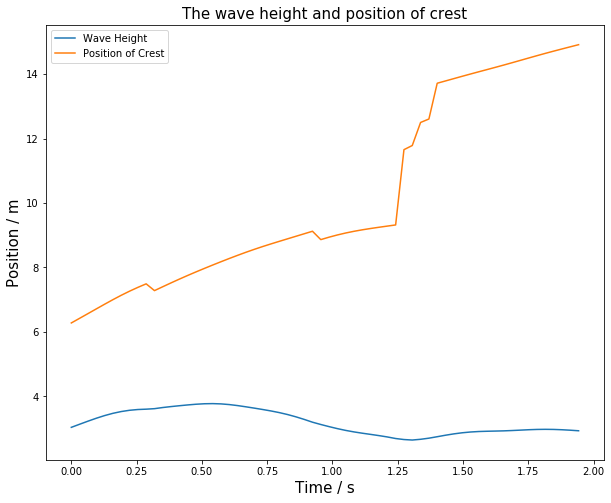

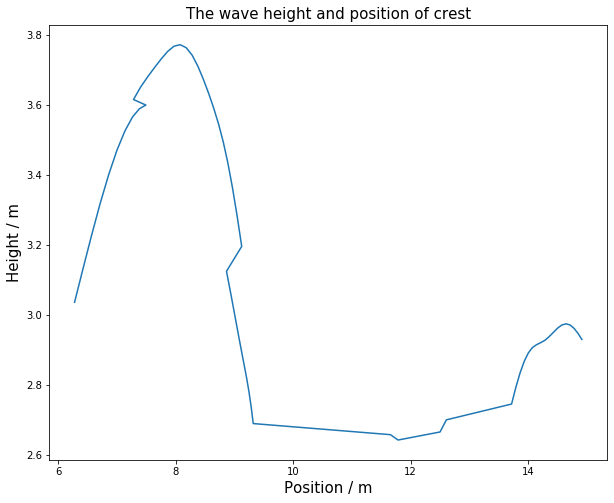

In [33]:
data = pd.read_csv("./SPH/SPH/convergence_test07_07.txt", sep=' ', header=None)
dt = 7*0.1*1.3*0.7/20
vel_6 = get_velocity(data, dt)

print(vel_6)
parameter_time(data, dt, 7)
parameter(data)

5.573792429792429


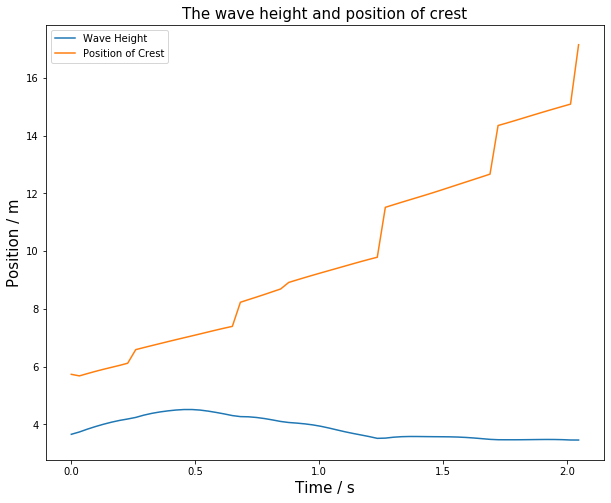

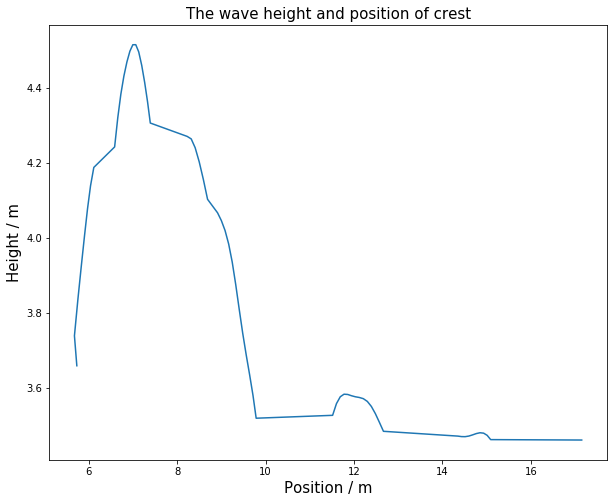

In [22]:
data = pd.read_csv("./SPH/SPH/convergence_test10_05.txt", sep=' ', header=None)
dt = 10*0.1*1.3*0.5/20
vel_1 = get_velocity(data, dt)

print(vel_1)
parameter_time(data, dt, 10)
parameter(data)

4.791401895206242


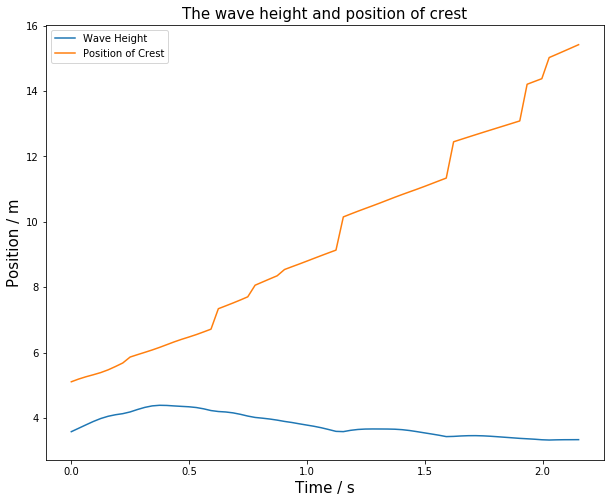

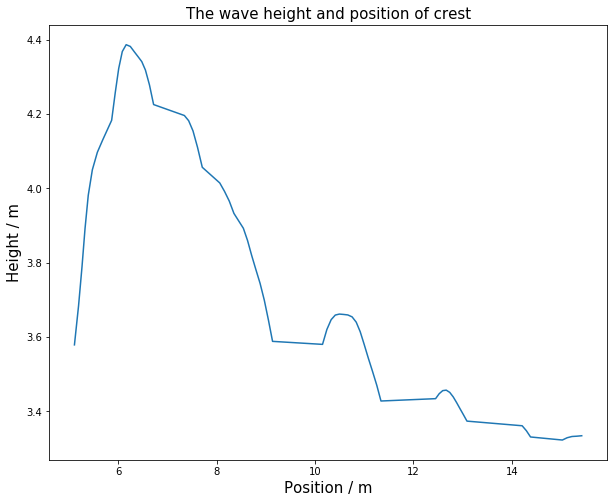

In [23]:
data = pd.read_csv("./SPH/SPH/convergence_test12_04.txt", sep=' ', header=None)
dt = 12*0.1*1.3*0.4/20
vel_2 = get_velocity(data, dt)

print(vel_2)
parameter_time(data, dt, 10)
parameter(data)

5.589227764423077


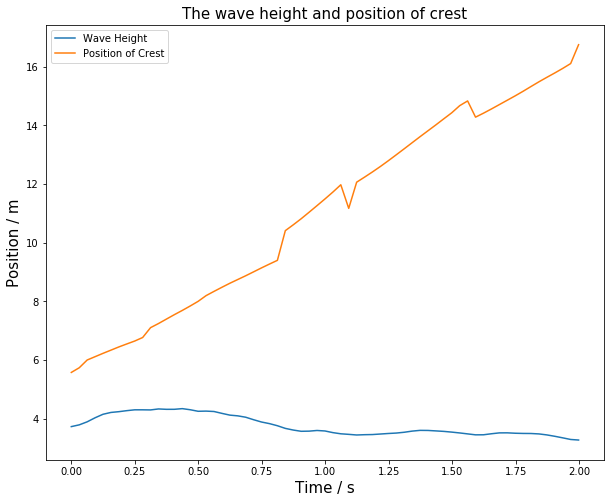

In [28]:
data = pd.read_csv("./SPH/SPH/convergence_test16_03.txt", sep=' ', header=None)
dt = 16*0.1*1.3*0.3/20
vel_3 = get_velocity(data, dt)

print(vel_3)
parameter_time(data, dt, 16)
#parameter(data)

5.892826636050516


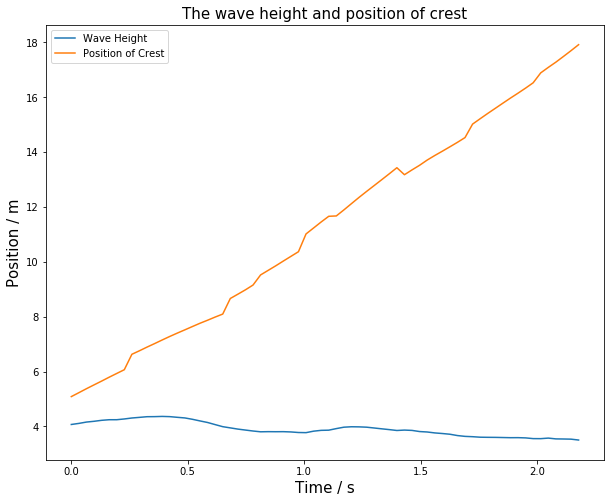

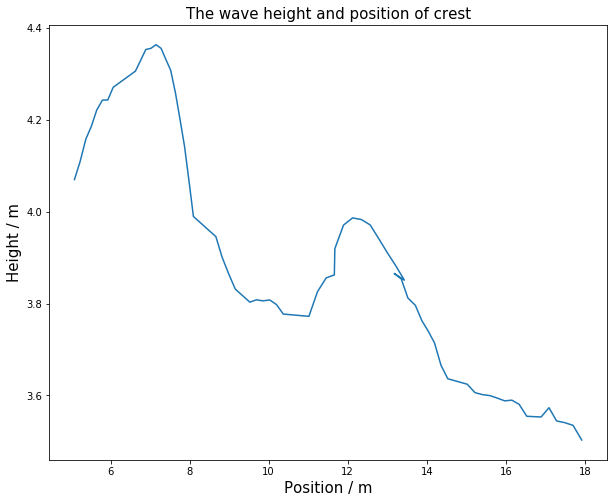

In [25]:
data = pd.read_csv("./SPH/SPH/convergence_test25_02.txt", sep=' ', header=None)
dt = 25*0.1*1.3*0.2/20
vel_4 = get_velocity(data, dt)

print(vel_4)
parameter_time(data, dt, 25)
parameter(data)

6.044390720390721


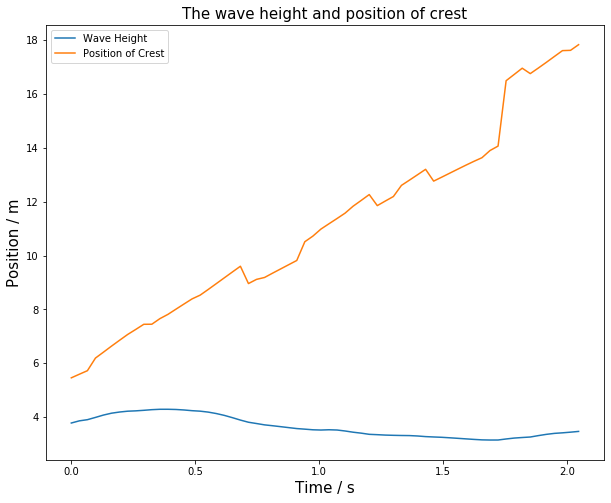

In [27]:
data = pd.read_csv("./SPH/SPH/convergence_test50_01.txt", sep=' ', header=None)
dt = 50*0.1*1.3*0.1/20
vel_5 = get_velocity(data, dt)

print(vel_5)
parameter_time(data, dt, 25)
#parameter(data)

Text(0.5, 1.0, 'The change of velocity for differnt dx')

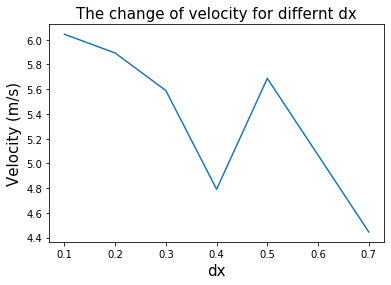

In [34]:
dx=np.array([0.7,0.5, 0.4, 0.3, 0.2, 0.1])
vel=np.array([vel_6, vel_1, vel_2, vel_3, vel_4, vel_5])

plt.plot(dx, vel)
plt.xlabel('dx', fontsize=15)
plt.ylabel('Velocity (m/s)', fontsize=15)
plt.title('The change of velocity for differnt dx', fontsize=15)

### 1, velocity vs. dx

The smaller dx we choose, the higher the wave phase velocity we get. But we need to ignore the the results of dx = 0.5 and 0.7, since they are too rough and won’t make any sense.By thinking of the physics behind the equation, we find that the result actually makes sense. Since if we choose smaller dx, the pile of particles will be more dense, which means that one particle would interact with more particles(have more neighbors). In this way, the interaction will be more obvious and greater, and it should be more close to the real world value. And it can be easily understand that the greater interaction between particles lead to the larger acceleration of particles. So that we get a higher wave phase speed.But we find that the smaller dx we use, the wave phase speed gets larger and away from the corresponding “real value”. We believe it is because of the sound speed we use in the simulation. The next step is to change the sound speed and find the relation between wave speed and sound speed.

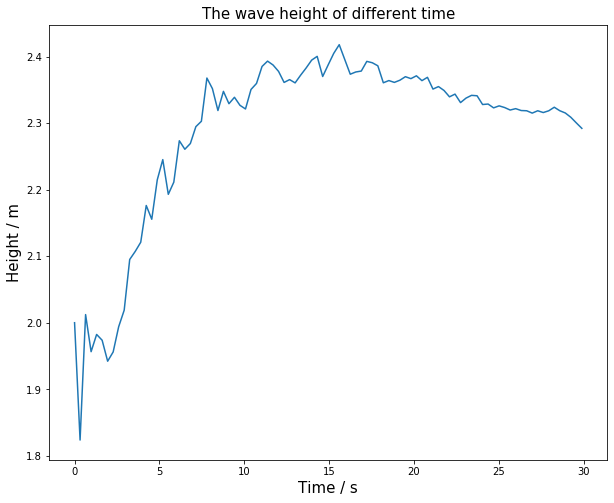

In [42]:
data = pd.read_csv("./SPH/SPH/convergence_0.5.txt", sep=' ', header=None)
dt = 100*0.1*1.3*0.5/20

waveheight_time(data, dt, 100)

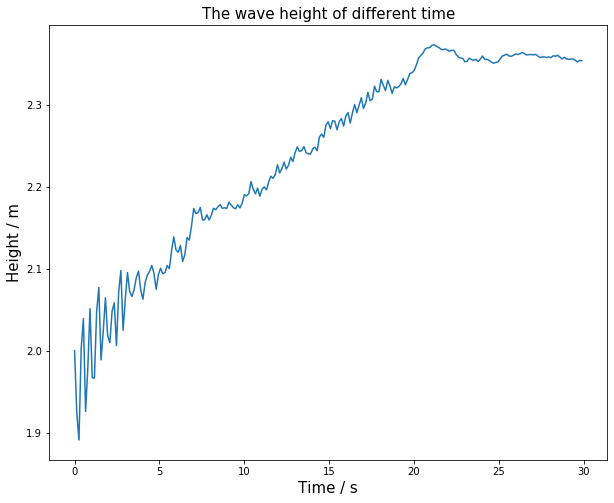

In [43]:
data = pd.read_csv("./SPH/SPH/convergence_0.2.txt", sep=' ', header=None)
dt = 100*0.1*1.3*0.2/20

waveheight_time(data, dt, 100)

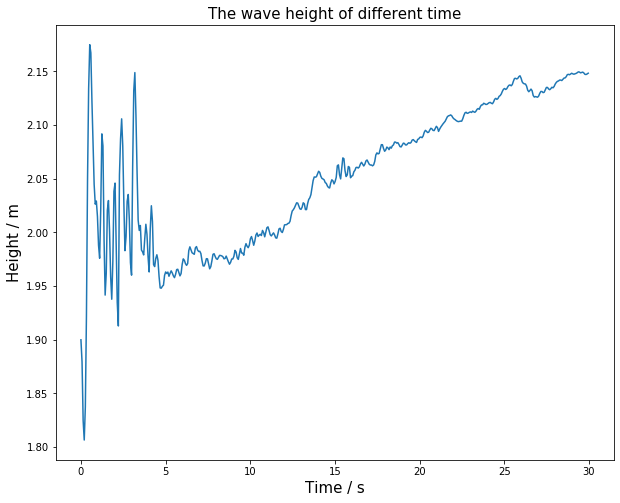

In [44]:
data = pd.read_csv("./SPH/SPH/convergence_0.1.txt", sep=' ', header=None)
dt = 100*0.1*1.3*0.1/20

waveheight_time(data, dt, 100)

In [6]:
data = pd.read_csv("./SPH/SPH/convergence_testwave_100.txt", sep=' ', header=None)
dt = 25*0.1*1.3*0.2/100
vel_7 = get_velocity(data, dt)

print(vel_7)

4.083675546243638


In [7]:
data = pd.read_csv("./SPH/SPH/convergence_testwave_200.txt", sep=' ', header=None)
dt = 25*0.1*1.3*0.2/200
vel_8 = get_velocity(data, dt)

print(vel_8)

3.9656381607219595


In [8]:
data = pd.read_csv("./SPH/SPH/convergence_testwave_300.txt", sep=' ', header=None)
dt = 25*0.1*1.3*0.2/300
vel_9 = get_velocity(data, dt)

print(vel_9)

4.149350279806507


In [9]:
data = pd.read_csv("./SPH/SPH/convergence_testwave_50.txt", sep=' ', header=None)
dt = 25*0.1*1.3*0.2/50
vel_10 = get_velocity(data, dt)

print(vel_10)

4.015678214914857


Text(0.5, 1.0, 'The change of velocity for differnt dx')

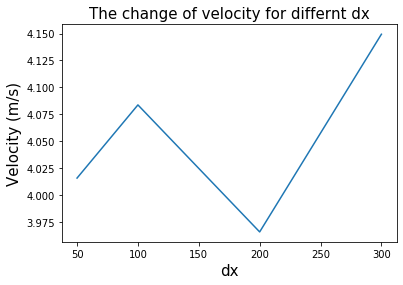

In [10]:
dx=np.array([50, 100, 200, 300])
vel=np.array([vel_10, vel_7, vel_8, vel_9])

plt.plot(dx, vel)
plt.xlabel('dx', fontsize=15)
plt.ylabel('Velocity (m/s)', fontsize=15)
plt.title('The change of velocity for differnt dx', fontsize=15)

### 2, velocity vs. sound velocity
The result above shows that if we choose higher sound speed, the wave speed will be closer to the “true value”.For the cases that sound speed equals 300m/s, which is very close to the real value(340m/s), we get a result of 4.15m/s. Compared to the expected shallow water speed, this condition gives us best simulation.